In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install kaggle

In [7]:
!kaggle datasets download -d grassknoted/asl-alphabet

 97% 1.00G/1.03G [00:11<00:00, 213MB/s]
100% 1.03G/1.03G [00:11<00:00, 93.8MB/s]


In [8]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

In [10]:
img_size = 224
batch_size = 32
epochs = 5
train_path = '/content/asl_alphabet_train/asl_alphabet_train'

test_path = '/content/asl_alphabet_test/asl_alphabet_test'

In [11]:
augment_train_data = ImageDataGenerator(horizontal_flip=True,
                                        rotation_range=50,
                                        zoom_range=0.2,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        rescale=1./255,
                                        validation_split=0.1)

augment_test_data = ImageDataGenerator(rescale=1./255)

In [12]:
train_dataset = augment_train_data.flow_from_directory(train_path,
                                                       shuffle=True,
                                                       classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                                                                'L', 'M', 'N',
                                                                'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
                                                                'Z', 'space',
                                                                'del', 'nothing'],
                                                       target_size=(
                                                           img_size, img_size),
                                                       batch_size=batch_size)

Found 87000 images belonging to 29 classes.


In [23]:
print(test_path)
test_dataset = augment_train_data.flow_from_directory(test_path,
                                                      classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                                                               'L', 'M', 'N',
                                                               'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
                                                               'Z', 'space', 'del', 'nothing'],
                                                      target_size=(
                                                          img_size, img_size),
                                                      batch_size=batch_size)
# test_dataset = augment_train_data.flow_from_directory(test_path,
#                                                       target_size=(
#                                                           img_size, img_size),
#                                                       batch_size=batch_size)

/content/asl_alphabet_test/asl_alphabet_test
Found 1 images belonging to 29 classes.


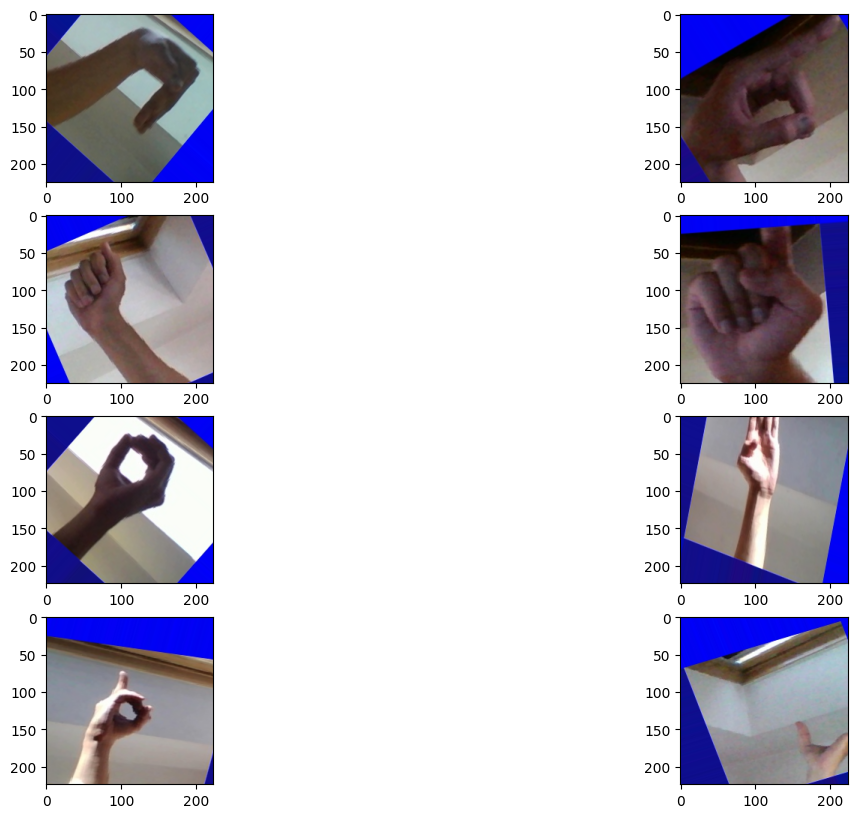

In [14]:
fig = plt.figure(figsize=(15, 10))
for i in range(1,9):
    plt.subplot(4,2,i)
    plt.imshow(train_dataset[0][0][i-1])
plt.show()

In [15]:
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

download_model = hub.KerasLayer(url,input_shape=(img_size,img_size,3))

model = Sequential([
    download_model,
    Dense(29),
    Activation("softmax")
])

In [16]:
model.compile(optimizer=Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [17]:
print("\n Model summary: ")
print(model.summary())

print("\n Model Training: ")
model.fit(train_dataset,
          batch_size=batch_size,
          epochs=epochs)


 Model summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 29)                29058     
                                                                 
 activation (Activation)     (None, 29)                0         
                                                                 
Total params: 3569323 (13.62 MB)
Trainable params: 29058 (113.51 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________
None

 Model Training: 
Epoch 1/5
2719/2719 [==============================] - 1174s 427ms/step - loss: 0.8038 - accuracy: 0.7558
Epoch 2/5
2719/2719 [==============================] - 1152s 424ms/step - loss: 0.5420 - accuracy: 0.8294
Epoch 3/5
2719/2719 [=

In [17]:
print("\n Model Evaluation: ")
model.evaluate(test_dataset)


 Model Evaluation: 


ValueError: ignored

In [18]:
model.save("/content/drive/MyDrive/Colab Notebooks/h5/asl_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# you can also save the model using this method
# model.save("/content/drive/My Drive/ASL-recognition/model/")

In [19]:
load_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/h5/asl_model.h5",custom_objects={"KerasLayer":hub.KerasLayer})
print(load_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 29)                29058     
                                                                 
 activation (Activation)     (None, 29)                0         
                                                                 
Total params: 3569323 (13.62 MB)
Trainable params: 29058 (113.51 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________
None


In [ ]:
# model.predict(test_dataset[0][0])